In [1]:
import numpy as np
import pandas as pd

In [2]:
df  = pd.read_csv('spam.csv',encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4864,ham,I'm really sorry I lit your hair on fire,NaN,NaN,NaN
2855,ham,"Japanese Proverb: If one Can do it, U too Can ...",NaN,NaN,NaN
4169,ham,"Mmmmmm ... I love you,so much, Ahmad ... I can...",NaN,NaN,NaN
2592,ham,My friend just got here and says he's upping h...,NaN,NaN,NaN
4703,ham,Yar but they say got some error.,NaN,NaN,NaN


Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...
3804,ham,Dude while were makin those weirdy brownies my...
584,ham,So how's scotland. Hope you are not over showi...
3612,ham,Depends on individual lor e hair dresser say p...
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...


In [8]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [9]:
df.sample(5)

,target,text
5359,ham,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...
5481,ham,Shall call now dear having food
4859,ham,"\Response\"" is one of d powerful weapon 2 occu..."
5360,ham,"Hey, iouri gave me your number, I'm wylie, rya..."
2614,ham,"Sir, hope your day is going smoothly. i really..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

EDA

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

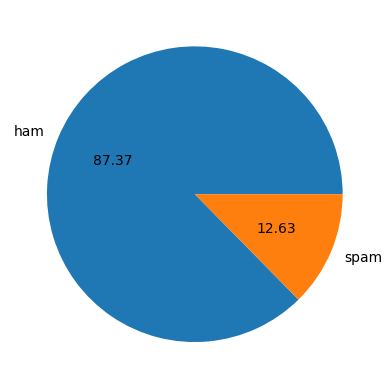

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['numberOf_characters']=df['text'].apply(len)

C:\Users\vinay\AppData\Local\Temp\ipykernel_10644\3229229594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numberOf_characters']=df['text'].apply(len)


In [22]:
df

,target,text,numberOf_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
df['numberOf_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\vinay\AppData\Local\Temp\ipykernel_10644\1114626560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numberOf_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [24]:
df

,target,text,numberOf_characters,numberOf_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
df['numberOf_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


C:\Users\vinay\AppData\Local\Temp\ipykernel_10644\1786367707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numberOf_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df

,target,text,numberOf_characters,numberOf_words,numberOf_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[df['target']==0][['numberOf_characters','numberOf_words','numberOf_sentences']].describe()   #ham

,numberOf_characters,numberOf_words,numberOf_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==1][['numberOf_characters','numberOf_words','numberOf_sentences']].describe()  #spam

,numberOf_characters,numberOf_words,numberOf_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='numberOf_words', ylabel='Count'>

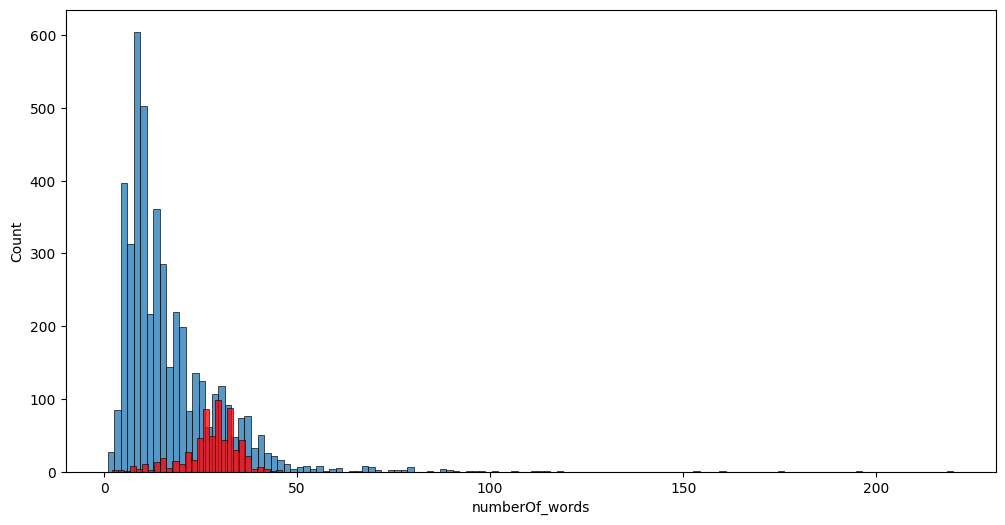

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['numberOf_words'])
sns.histplot(df[df['target']==1]['numberOf_words'],color='red')

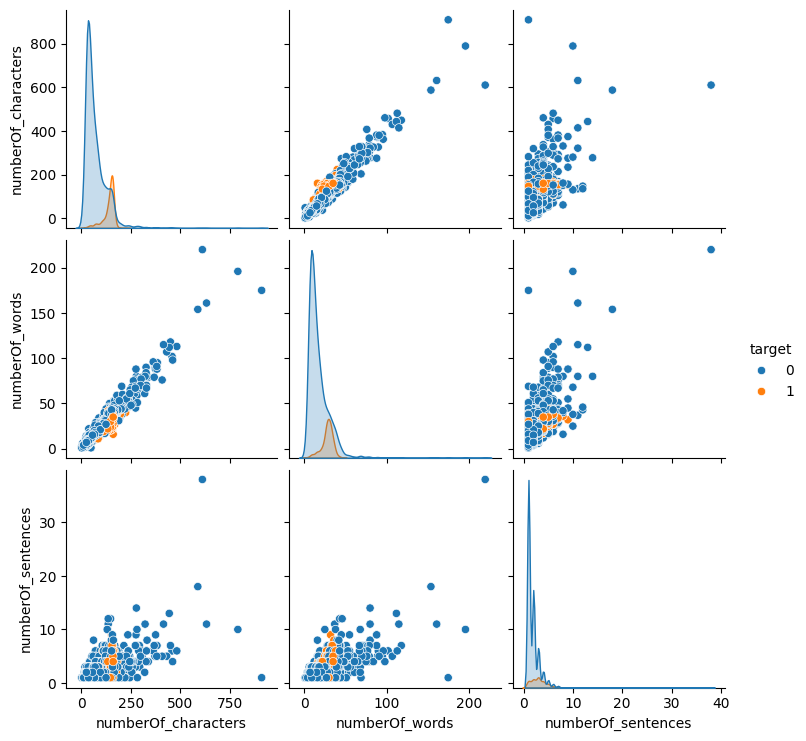

In [31]:
sns.pairplot(df,hue='target')

<Axes: >

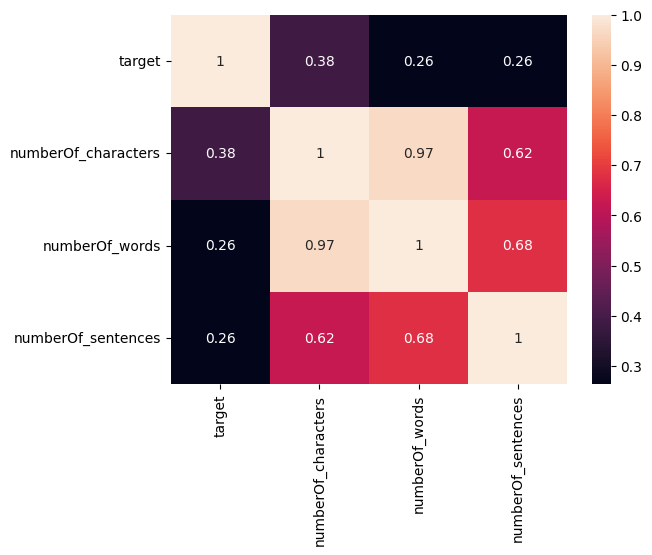

In [32]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [37]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalpha():
            y.append(i)
    
    text = y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y.copy()
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
text_transform(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
df['transformed_text']=df['text'].apply(text_transform)

C:\Users\vinay\AppData\Local\Temp\ipykernel_10644\225956876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(text_transform)


In [41]:
df

,target,text,numberOf_characters,numberOf_words,numberOf_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,time tri contact u pound prize claim easi call...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [42]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500, min_font_size=10,background_color='white')

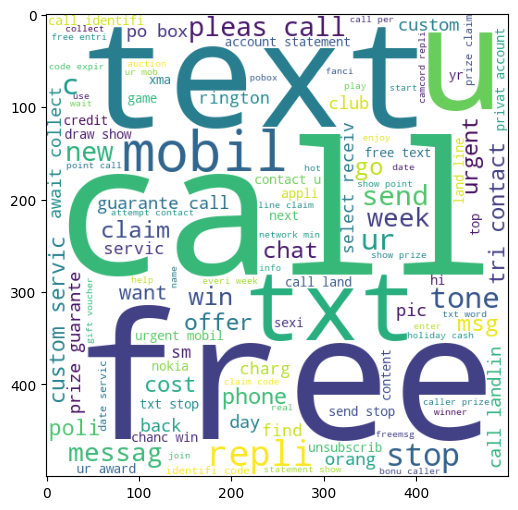

In [43]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

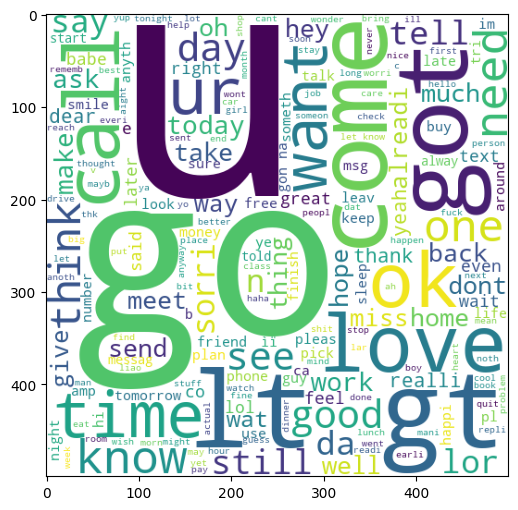

In [44]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [45]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

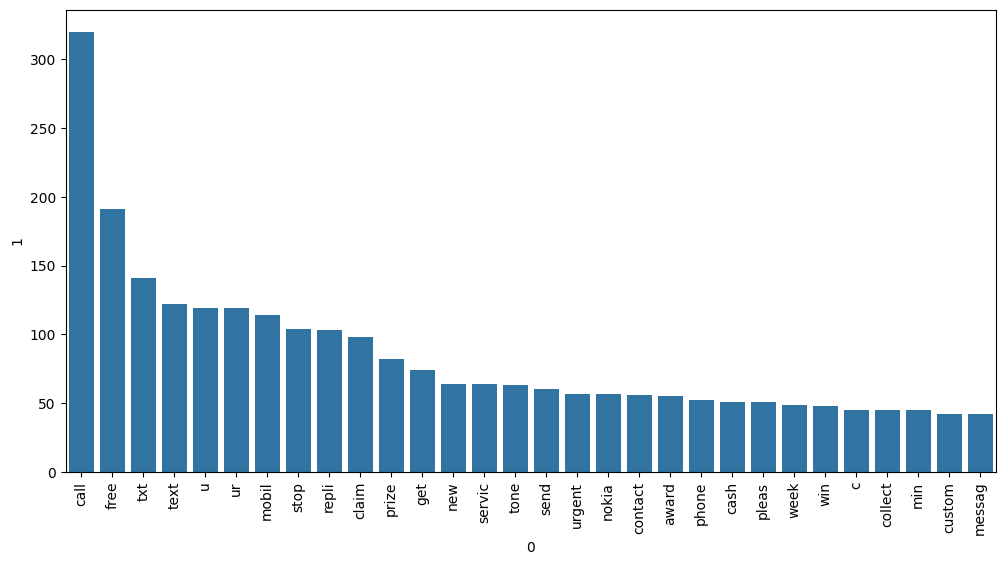

In [46]:
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],data=df)
plt.xticks(rotation = 'vertical')
plt.show()

In [47]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
len(ham_corpus)

34494

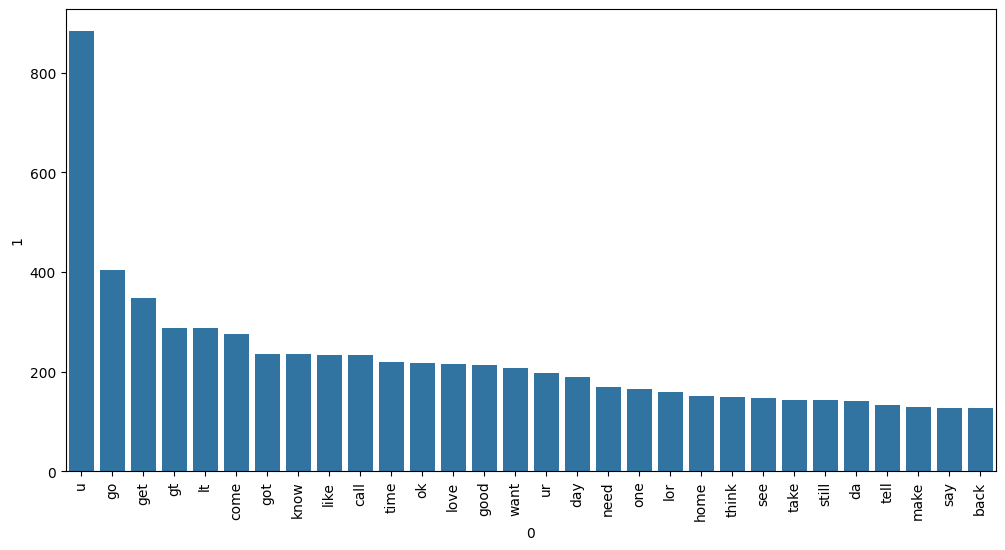

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],data=df)
plt.xticks(rotation = 'vertical')
plt.show()

Model Building

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [69]:
x = tfid.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [70]:
x.shape

(5169, 3000)

In [71]:
y = df['target'].values

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [194]:
gnb.fit(x_train,y_train)
ypred1 = gnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.8694390715667312
[[792 104]
 [ 31 107]]
0.5071090047393365


In [76]:
mnb.fit(x_train,y_train)
ypred2 = mnb.predict(x_test)
print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [196]:
bnb.fit(x_train,y_train)
ypred2 = bnb.predict(x_test)
print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc = SVC(kernel='sigmoid',gamma=1.0)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimators=50,random_state = 2)


In [62]:
clfs = {
    'SVC':svc,
    'LR':lrc,
    'MNB':mnb,
    'DT':dtc,
    'KN':knc,
    'RF':rfc,
    'AdaBoost':abc,
    'BC':bc,
    'ET':etc,
    'GBDT':gdbc,
    'XGB':xgbc
}

In [199]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [200]:
train_classifier(svc,x_train,x_test,y_train,y_test)

(0.9729206963249516, 0.9741379310344828)

In [201]:
accuracy_scores = []
precision_scores = []

for name ,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,x_test,y_train,y_test)

    print("For: ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For:  LR
Accuracy:  0.9564796905222437
Precision:  0.9696969696969697
For:  MNB
Accuracy:  0.9700193423597679
Precision:  1.0
For:  DT
Accuracy:  0.9284332688588007
Precision:  0.8137254901960784
For:  KN
Accuracy:  0.9119922630560928
Precision:  1.0
For:  RF
Accuracy:  0.9729206963249516
Precision:  0.9824561403508771
For:  AdaBoost
Accuracy:  0.9206963249516441
Precision:  0.8255813953488372
For:  BC
Accuracy:  0.9555125725338491
Precision:  0.8650793650793651
For:  ET
Accuracy:  0.9758220502901354
Precision:  0.9669421487603306
For:  GBDT
Accuracy:  0.9477756286266924
Precision:  0.9375
For:  XGB
Accuracy:  0.9642166344294004
Precision:  0.9391304347826087


In [141]:
performance_df = pd.DataFrame({"Algorithms":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values('Precision',ascending=False)

In [142]:
performance_df

,Algorithms,Accuracy,Precision
2,MNB,0.959381,1.000000
4,KN,0.911025,1.000000
5,RF,0.972921,0.991071
8,ET,0.971954,0.973913
0,SVC,0.970019,0.973451
1,LR,0.954545,0.959596
10,XGB,0.969052,0.956897
9,GBDT,0.945841,0.918367
7,BC,0.956480,0.860465
3,DT,0.934236,0.843137


In [202]:
temp_df = pd.DataFrame({"Algorithms":clfs.keys(),"Accuracy_score_after_max_3000":accuracy_scores,"Precision_score_after_max_3000":precision_scores})

In [ ]:
# temp_df1 = pd.DataFrame({"Algorithms":clfs.keys(),"Accuracy_scaling":accuracy_scores,"Precision_scaling":precision_scores})

In [203]:
new_df = performance_df.merge(temp_df,on="Algorithms")

In [ ]:
# new_df_scaled = new_df.merge(temp_df1,on = "Algorithms")

In [204]:
new_df

,Algorithms,Accuracy,Precision,Accuracy_score_after_max_3000,Precision_score_after_max_3000
0,MNB,0.959381,1.000000,0.970019,1.000000
1,KN,0.911025,1.000000,0.911992,1.000000
2,RF,0.972921,0.991071,0.972921,0.982456
3,ET,0.971954,0.973913,0.975822,0.966942
4,SVC,0.970019,0.973451,0.972921,0.974138
5,LR,0.954545,0.959596,0.956480,0.969697
6,XGB,0.969052,0.956897,0.964217,0.939130
7,GBDT,0.945841,0.918367,0.947776,0.937500
8,BC,0.956480,0.860465,0.955513,0.865079
9,DT,0.934236,0.843137,0.928433,0.813725


In [63]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [64]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [65]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [66]:
y_pred_for_voting = voting.predict(x_test)
print("Accuracy_score: ",accuracy_score(y_test,y_pred_for_voting))
print("Precision_score: ",precision_score(y_test,y_pred_for_voting))

Accuracy_score:  0.97678916827853
Precision_score:  0.9830508474576272


In [78]:
estimators = [('smv',svc),('nb',mnb),('et',etc)]

final_estimator = RandomForestClassifier()

In [79]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [80]:
clf.fit(x_train,y_train)
y_pred_stacking = clf.predict(x_test)
print("Accruary score: ",accuracy_score(y_test,y_pred_stacking))
print("Precision score: ", precision_score(y_test,y_pred_stacking))

Accruary score:  0.9777562862669246
Precision score:  0.952755905511811


In [ ]:
""" so we are not going to use voting classifier or stacking because the results not that much good 
we are use multinomial naive bias algorithms because it gave us the 100% precisions (means it will not going to False positive answer,
 where the actual is false but it gives true) and highest accuracy as compare to the other models
we choose tidf vecterizer with max_features 3000 with multinomial naive bias model"""

In [ ]:
# import pickle
# pickle.dump(tfid,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))